In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(r"/content/gdrive/MyDrive/EFI/Clean Data/data_model.csv")
df = df.drop(columns=["index"])
sample_information = pd.read_excel(r"/content/gdrive/MyDrive/EFI/Data/Sample 2007-2017/Final Sample.xlsx")
cols_to_keep = ["EQY TICKER", "Country", "Industry"]
sample_information = sample_information[cols_to_keep]

In [ ]:
merged_df = pd.merge(df, sample_information, left_on="Ticker", right_on="EQY TICKER")
merged_df = merged_df.drop(columns=["EQY TICKER"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


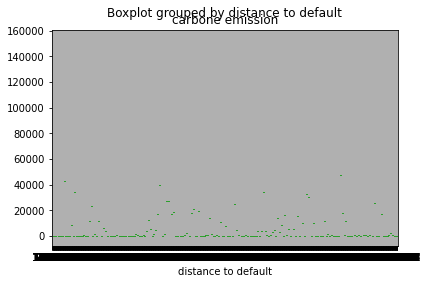

In [ ]:
merged_df.boxplot(column="carbone emission", by="distance to default")

In [ ]:
temp_df = merged_df[["Date", "Ticker", "distance to default", "carbone emission", "carbone intensity",
                    "market cap", "operating margin", "total assets", "working capital",
                    "retained earnings", "debt ratio", "volatility", "retained earnings ratio",
                    "working capital ratio", "Oil", "Natural Gas"]]

In [ ]:
merged_df = pd.read_csv(r"/content/gdrive/MyDrive/EFI/Clean Data/data_model.csv")

In [ ]:
merged_df = merged_df.drop(columns=["Unnamed: 0"])

In [ ]:
merged_df.columns

Index(['Ticker', 'Date', 'carbone emission', 'distance to default',
       'market cap', 'operating margin', 'total assets', 'working capital',
       'retained earnings', 'debt ratio', 'volatility', 'carbone intensity',
       'Oil', 'Natural Gas', 'log carbone emission', 'log carbone intensity',
       'log total assets', 'retained earnings ratio', 'working capital ratio',
       'event', 'log carbone emission ante', 'log carbone emission post',
       'log carbone intensity ante', 'log carbone intensity post',
       'carbone intensity ante', 'carbone intensity post', 'Country',
       'Industry'],
      dtype='object')

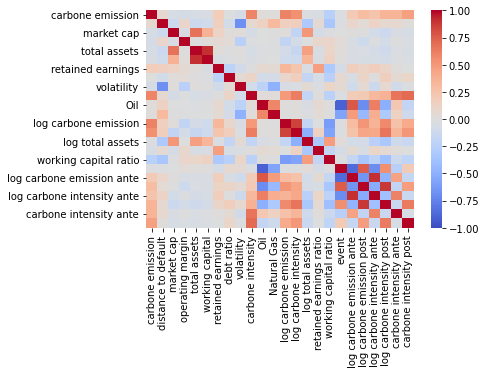

In [ ]:
mask_energy = merged_df["Industry"] == "Energy"
industry = merged_df.loc[mask_energy]

In [ ]:
x = industry.groupby("Date").mean()
x = x.reset_index()

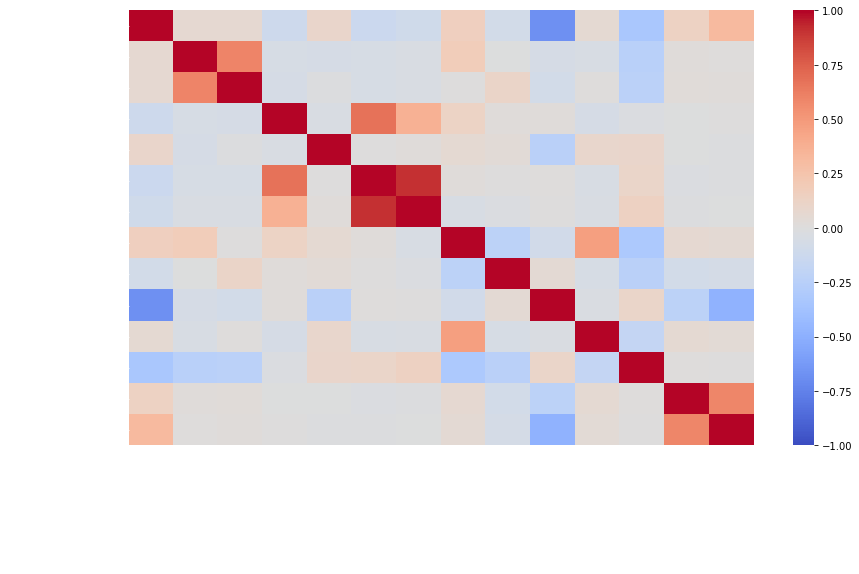

In [ ]:
plt.figure(figsize=(14, 8))
ax = plt.axes()

filtre = merged_df["Country"].isin(merged_df["Country"].value_counts().index[0:6])

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.tick_params(axis='x', rotation=45, colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_ylabel("Intensité Carbone", color="white")
ax.set_xlabel("Date", color="white")

sns.heatmap(temp_df.corr(), vmin=-1, vmax=1, cmap="coolwarm")

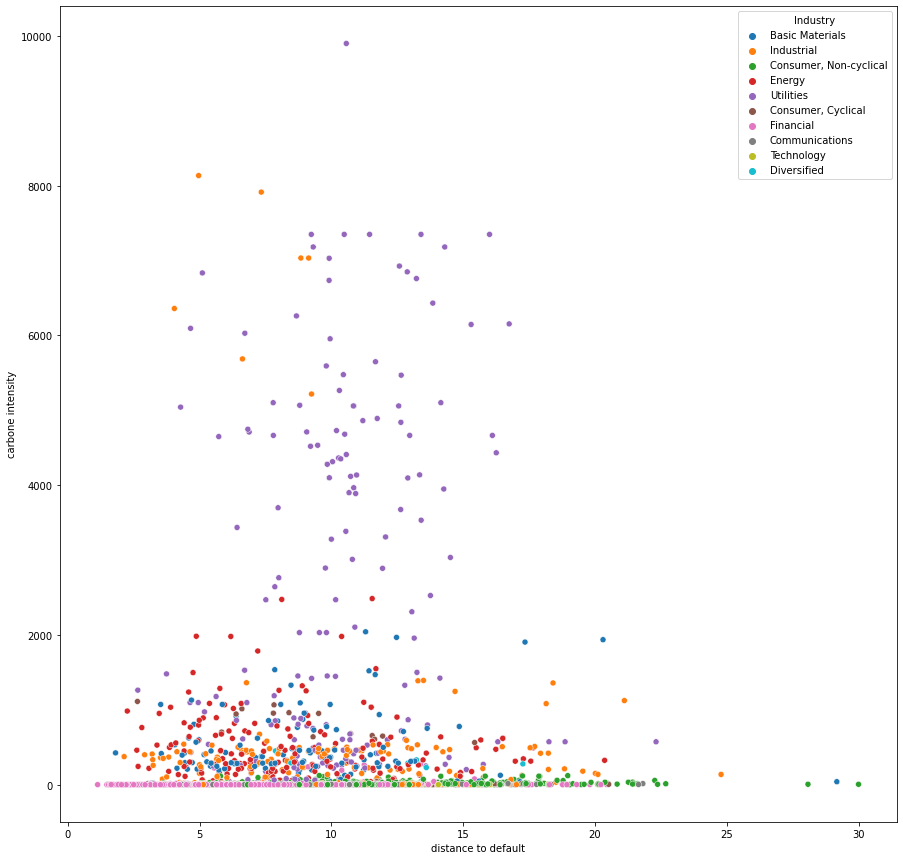

In [ ]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="distance to default", y="carbone intensity", data=merged_df, hue='Industry')

In [ ]:
mask_date = pd.to_datetime(temp_df["Date"]) >= pd.to_datetime("2017-03-31")
temp_df = temp_df.loc[mask_date]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


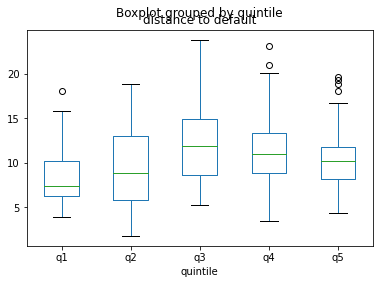

In [ ]:
test_df = temp_df.groupby("Ticker").mean()
quintile_cut = pd.qcut(test_df["carbone intensity"], 5, labels=["q1", "q2", "q3", "q4", "q5"])
test_df["quintile"] = quintile_cut
test_df.boxplot(column=["distance to default"], by="quintile", grid=False)